In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('main.csv')

In [4]:
df

,index,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,status_group
0,0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,unknown,Lake Nyasa,...,False,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional
1,2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,...,True,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional
2,3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,...,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional
3,4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,...,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional
4,5,9944,20.0,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,Pangani,...,True,2009,submersible,vwc,pay per bucket,salty,enough,other,communal standpipe multiple,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47994,59394,11164,500.0,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,Wami / Ruvu,...,True,2007,submersible,vwc,pay monthly,soft,enough,machine dbh,communal standpipe,non functional
47995,59395,60739,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,...,True,1999,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,functional
47996,59396,27263,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,...,True,1996,gravity,vwc,pay annually,soft,enough,river,communal standpipe,functional
47997,59398,31282,0.0,Malec,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,...,True,0,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,functional


In [5]:
df.drop(columns = ['index'],inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47999 entries, 0 to 47998
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 47999 non-null  int64  
 1   amount_tsh         47999 non-null  float64
 2   funder             47999 non-null  object 
 3   gps_height         47999 non-null  int64  
 4   installer          47999 non-null  object 
 5   longitude          47999 non-null  float64
 6   latitude           47999 non-null  float64
 7   wpt_name           47999 non-null  object 
 8   basin              47999 non-null  object 
 9   subvillage         47999 non-null  object 
 10  region             47999 non-null  object 
 11  region_code        47999 non-null  int64  
 12  district_code      47999 non-null  int64  
 13  lga                47999 non-null  object 
 14  ward               47999 non-null  object 
 15  population         47999 non-null  int64  
 16  public_meeting     479

In [7]:
df['permit'].unique()

array([False,  True])

#### lets first check the value counts for status_group

In [8]:
df['status_group'].value_counts()

functional        28178
non functional    19821
Name: status_group, dtype: int64

In [9]:
df['status_group_bin'] = df['status_group']

In [10]:
df['status_group_bin'].replace(to_replace = 'functional', value = 1, inplace=True )
df['status_group_bin'].replace(to_replace = 'non functional', value = 0, inplace=True )

In [11]:
df.drop(columns = ['id'], inplace= True)

### lets check the heat map to check which of the numerica features are most correlated with the status group

In [12]:
df.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'permit', 'construction_year', 'extraction_type',
       'management', 'payment', 'water_quality', 'quantity', 'source',
       'waterpoint_type', 'status_group', 'status_group_bin'],
      dtype='object')

In [13]:
heat_mp = df.corr()

In [14]:
heat_mp

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,public_meeting,permit,construction_year,status_group_bin
amount_tsh,1.000000,0.090274,0.011740,-0.067642,-0.035151,-0.034452,0.014267,0.016830,0.027610,0.076018,0.062597
gps_height,0.090274,1.000000,-0.019576,-0.100060,-0.201776,-0.168349,0.104093,0.062320,0.034068,0.626365,0.151469
longitude,0.011740,-0.019576,1.000000,-0.302311,0.147471,0.246719,0.066260,0.034788,0.031840,0.481957,-0.012872
latitude,-0.067642,-0.100060,-0.302311,1.000000,-0.246219,-0.191160,-0.056871,0.040664,0.125480,-0.321768,0.021491
region_code,-0.035151,-0.201776,0.147471,-0.246219,1.000000,0.675599,0.092875,-0.028063,-0.035370,0.025647,-0.114758
district_code,-0.034452,-0.168349,0.246719,-0.191160,0.675599,1.000000,0.070132,0.006378,-0.074148,0.073414,-0.074016
population,0.014267,0.104093,0.066260,-0.056871,0.092875,0.070132,1.000000,0.011267,-0.060279,0.250283,0.015171
public_meeting,0.016830,0.062320,0.034788,0.040664,-0.028063,0.006378,0.011267,1.000000,0.148951,0.046091,0.082819
permit,0.027610,0.034068,0.031840,0.125480,-0.035370,-0.074148,-0.060279,0.148951,1.000000,0.029639,0.048484
construction_year,0.076018,0.626365,0.481957,-0.321768,0.025647,0.073414,0.250283,0.046091,0.029639,1.000000,0.070008


<AxesSubplot:>

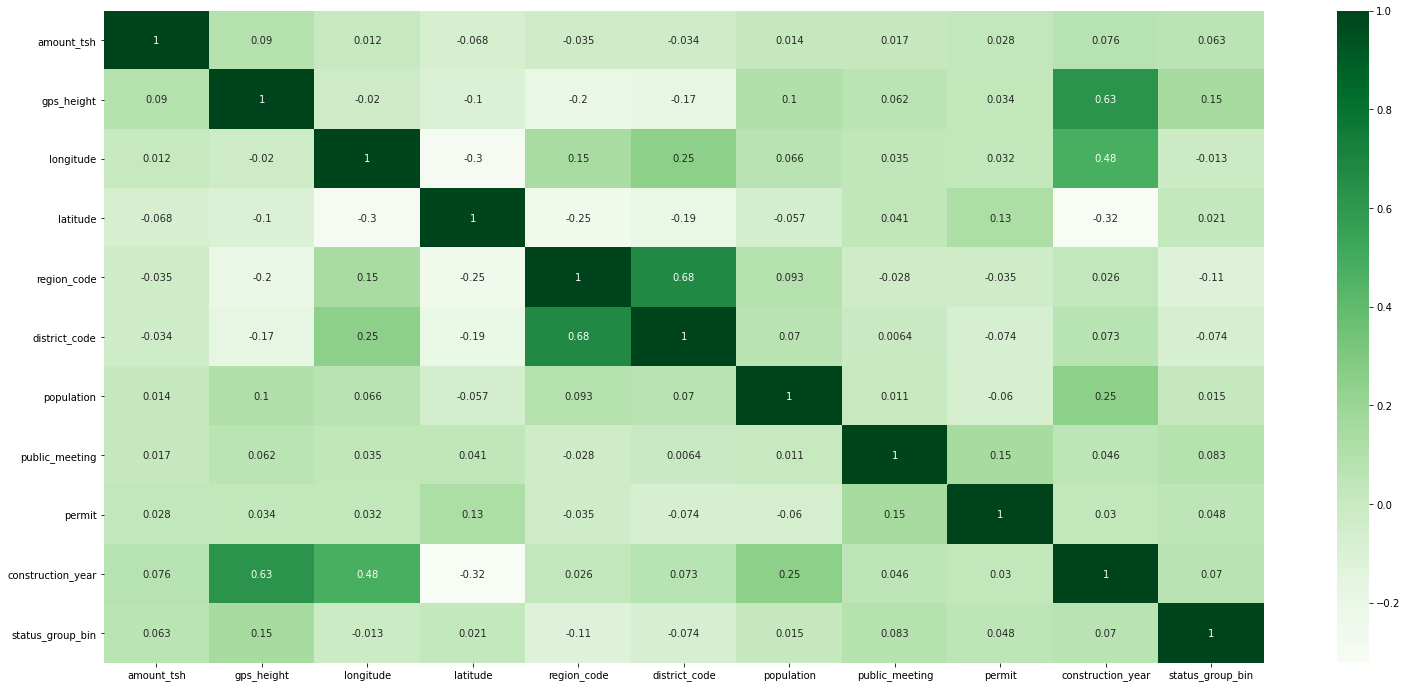

In [15]:
plt.figure(figsize=(26,12))
sns.heatmap(heat_mp, annot=True, cmap="Greens")

### count of functional and non functional waterpoints

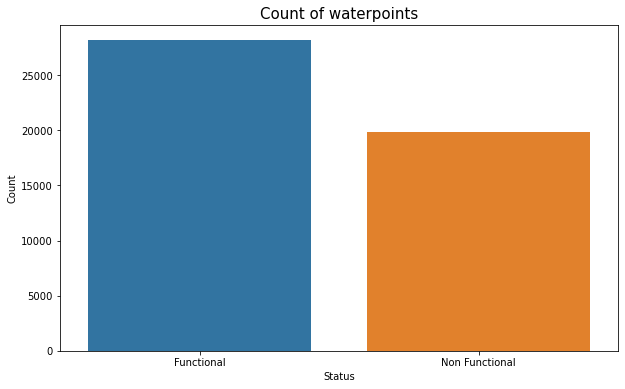

In [16]:
fig,ax = plt.subplots(figsize=(10,6))
g = sns.countplot( x = 'status_group',  data = df)
plt.title('Count of waterpoints',fontsize=15)
ax.set_xlabel('Status')
ax.set_ylabel('Count')
g.set_xticks(range(2))
g.set_xticklabels(['Functional','Non Functional']);

In [17]:
df['status_group'].value_counts()

functional        28178
non functional    19821
Name: status_group, dtype: int64

In [16]:
df['status_group'].value_counts()

functional        28178
non functional    19821
Name: status_group, dtype: int64

### water points counts based on quality of water

[Text(0, 0, 'soft'),
 Text(1, 0, 'salty'),
 Text(2, 0, 'milky'),
 Text(3, 0, 'unknown'),
 Text(4, 0, 'fluoride'),
 Text(5, 0, 'salty abandoned'),
 Text(6, 0, 'coloured'),
 Text(7, 0, 'fluoride abandoned')]

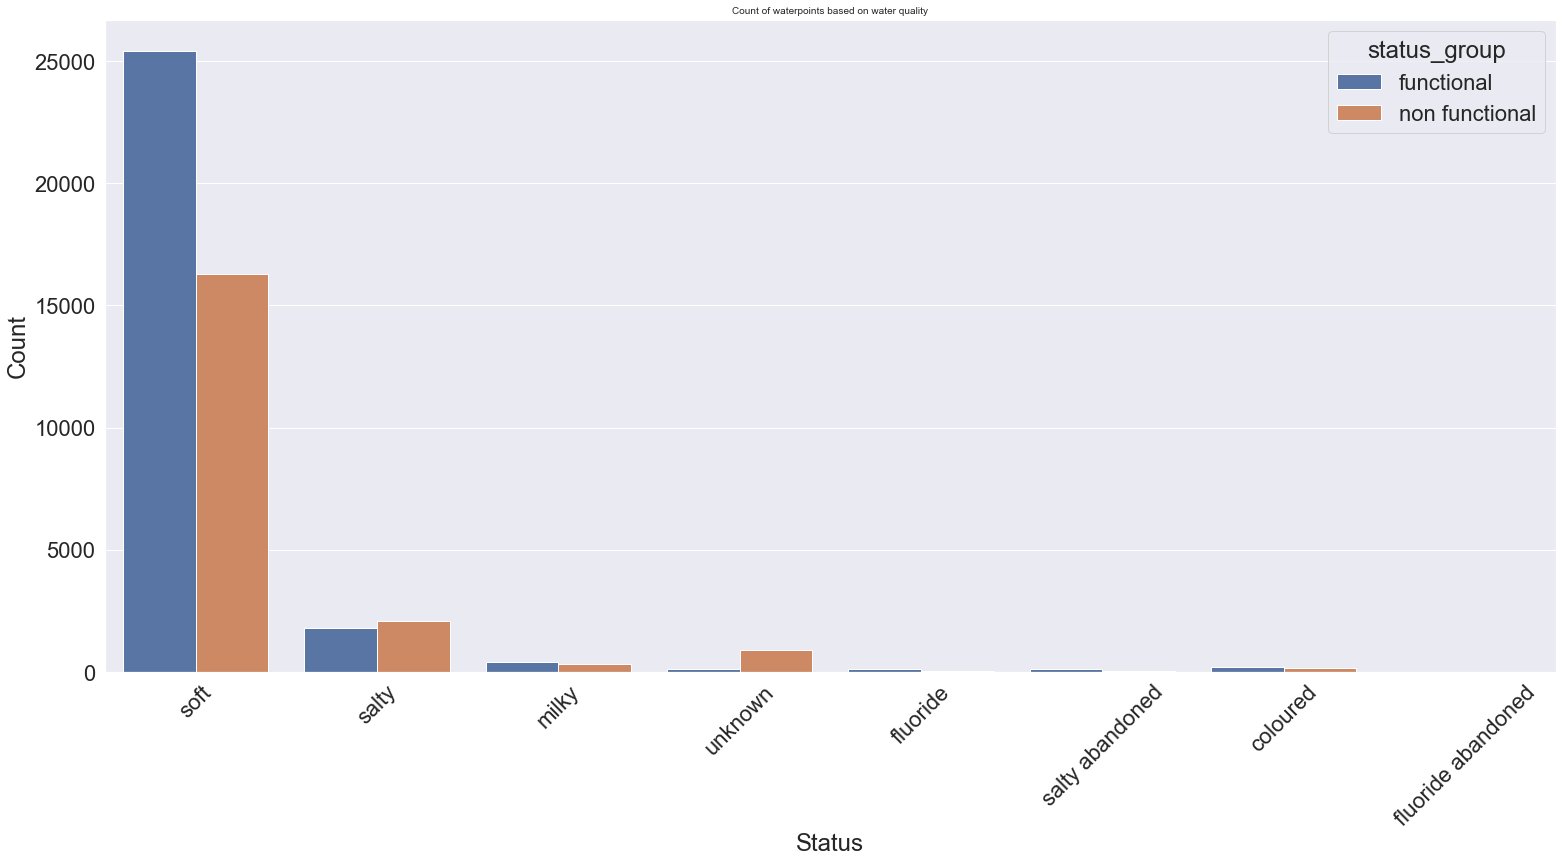

In [30]:
fig,ax = plt.subplots(figsize=(26,12))
ax = sns.countplot(x='water_quality', hue="status_group", data=df)
sns.set(font_scale =2)
plt.title('Count of waterpoints based on water quality',fontsize=10)
ax.set_xlabel('Status')
ax.set_ylabel('Count')
g.set_xticks(range(2))
g.set_xticklabels(['Functional','Non Functional']);
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

### waterpoint counts based on the region

[Text(0, 0, 'Iringa'),
 Text(1, 0, 'Manyara'),
 Text(2, 0, 'Mtwara'),
 Text(3, 0, 'Kagera'),
 Text(4, 0, 'Tanga'),
 Text(5, 0, 'Shinyanga'),
 Text(6, 0, 'Tabora'),
 Text(7, 0, 'Pwani'),
 Text(8, 0, 'Ruvuma'),
 Text(9, 0, 'Kilimanjaro'),
 Text(10, 0, 'Rukwa'),
 Text(11, 0, 'Kigoma'),
 Text(12, 0, 'Lindi'),
 Text(13, 0, 'Dodoma'),
 Text(14, 0, 'Arusha'),
 Text(15, 0, 'Mbeya'),
 Text(16, 0, 'Mwanza'),
 Text(17, 0, 'Singida'),
 Text(18, 0, 'Morogoro'),
 Text(19, 0, 'Mara'),
 Text(20, 0, 'Dar es Salaam')]

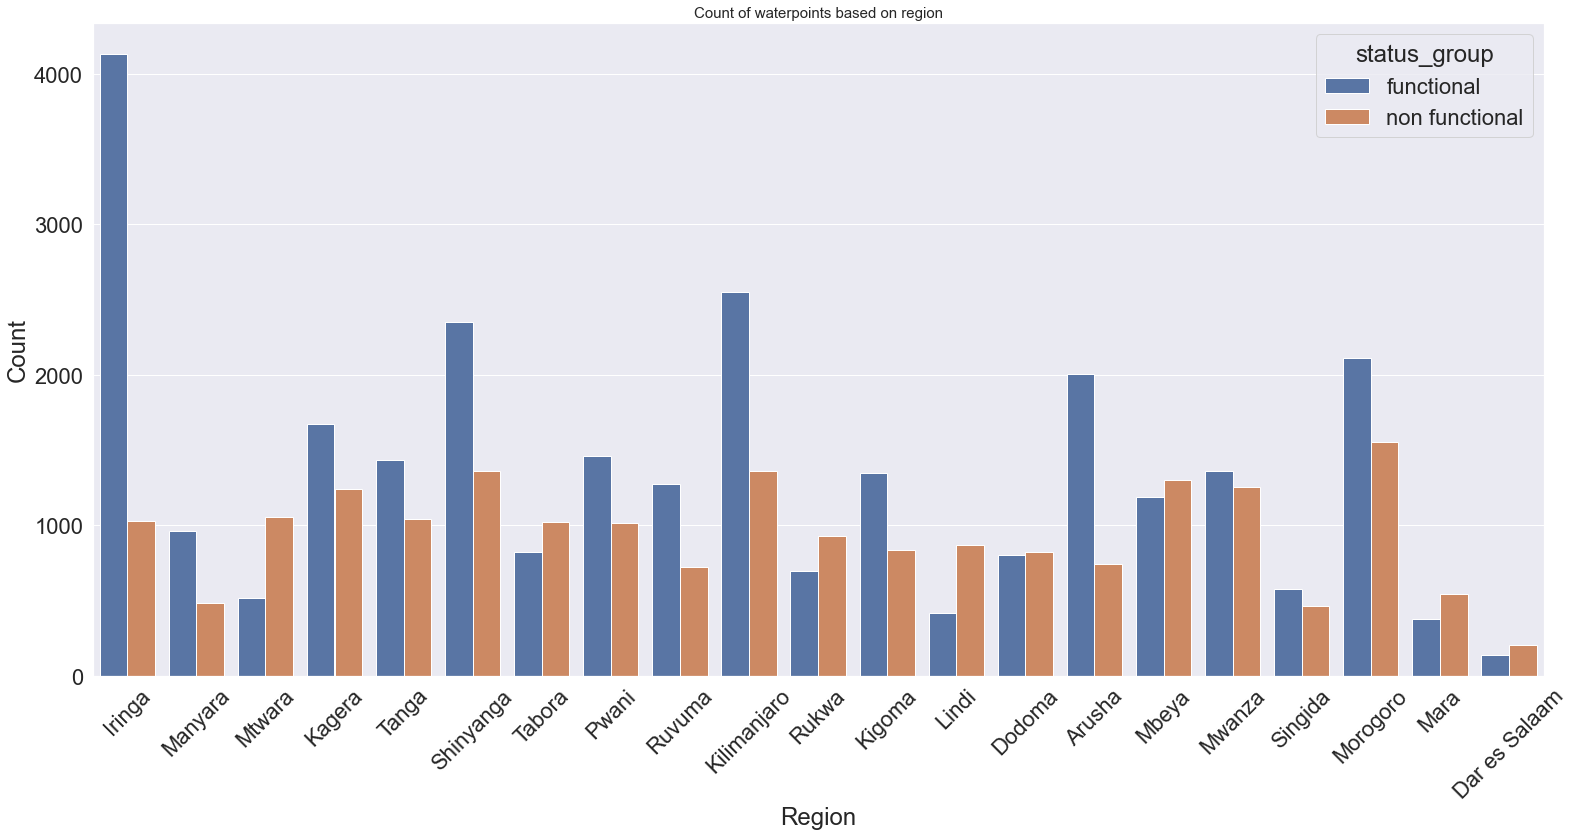

In [55]:
fig,ax = plt.subplots(figsize=(26,12))
ax = sns.countplot(x='region', hue="status_group", data=df)
sns.set(font_scale = 5)
plt.title('Count of waterpoints based on region',fontsize=15)
ax.set_xlabel('Region')
ax.set_ylabel('Count')
g.set_xticks(range(2))
g.set_xticklabels(['Functional','Non Functional']);
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

### how much population of the regions belongs to functional and non functional water points

[Text(0, 0, 'Iringa'),
 Text(1, 0, 'Manyara'),
 Text(2, 0, 'Mtwara'),
 Text(3, 0, 'Kagera'),
 Text(4, 0, 'Tanga'),
 Text(5, 0, 'Shinyanga'),
 Text(6, 0, 'Tabora'),
 Text(7, 0, 'Pwani'),
 Text(8, 0, 'Ruvuma'),
 Text(9, 0, 'Kilimanjaro'),
 Text(10, 0, 'Rukwa'),
 Text(11, 0, 'Kigoma'),
 Text(12, 0, 'Lindi'),
 Text(13, 0, 'Dodoma'),
 Text(14, 0, 'Arusha'),
 Text(15, 0, 'Mbeya'),
 Text(16, 0, 'Mwanza'),
 Text(17, 0, 'Singida'),
 Text(18, 0, 'Morogoro'),
 Text(19, 0, 'Mara'),
 Text(20, 0, 'Dar es Salaam')]

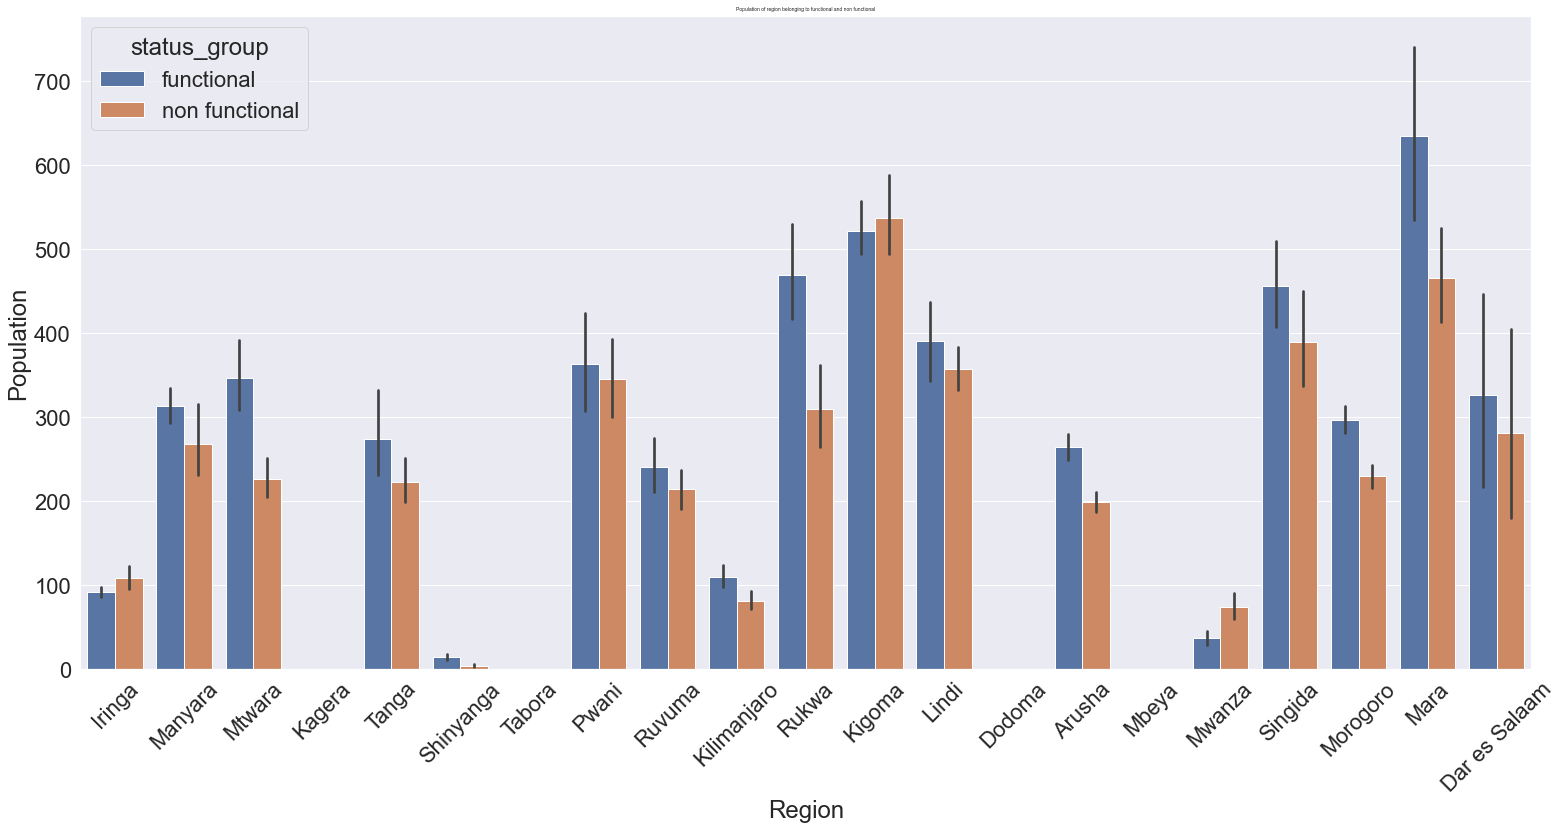

In [29]:
fig,ax = plt.subplots(figsize=(26,12))
ax = sns.barplot(x='region', y = "population", hue = "status_group",data=df)
sns.set(font_scale = 2)
plt.title('Population of region belonging to functional and non functional',fontsize=5)
ax.set_xlabel('Region')
ax.set_ylabel('Population')
g.set_xticks(range(2))
g.set_xticklabels(['Functional','Non Functional']);
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

#### it can be seen that there are many regions, where the populations dont have access to water. Since, many waterpoints are non functional, most of the population in the region is dependent on the functional water points which are not much.

### Population of region

[Text(0, 0, 'Iringa'),
 Text(1, 0, 'Manyara'),
 Text(2, 0, 'Mtwara'),
 Text(3, 0, 'Kagera'),
 Text(4, 0, 'Tanga'),
 Text(5, 0, 'Shinyanga'),
 Text(6, 0, 'Tabora'),
 Text(7, 0, 'Pwani'),
 Text(8, 0, 'Ruvuma'),
 Text(9, 0, 'Kilimanjaro'),
 Text(10, 0, 'Rukwa'),
 Text(11, 0, 'Kigoma'),
 Text(12, 0, 'Lindi'),
 Text(13, 0, 'Dodoma'),
 Text(14, 0, 'Arusha'),
 Text(15, 0, 'Mbeya'),
 Text(16, 0, 'Mwanza'),
 Text(17, 0, 'Singida'),
 Text(18, 0, 'Morogoro'),
 Text(19, 0, 'Mara'),
 Text(20, 0, 'Dar es Salaam')]

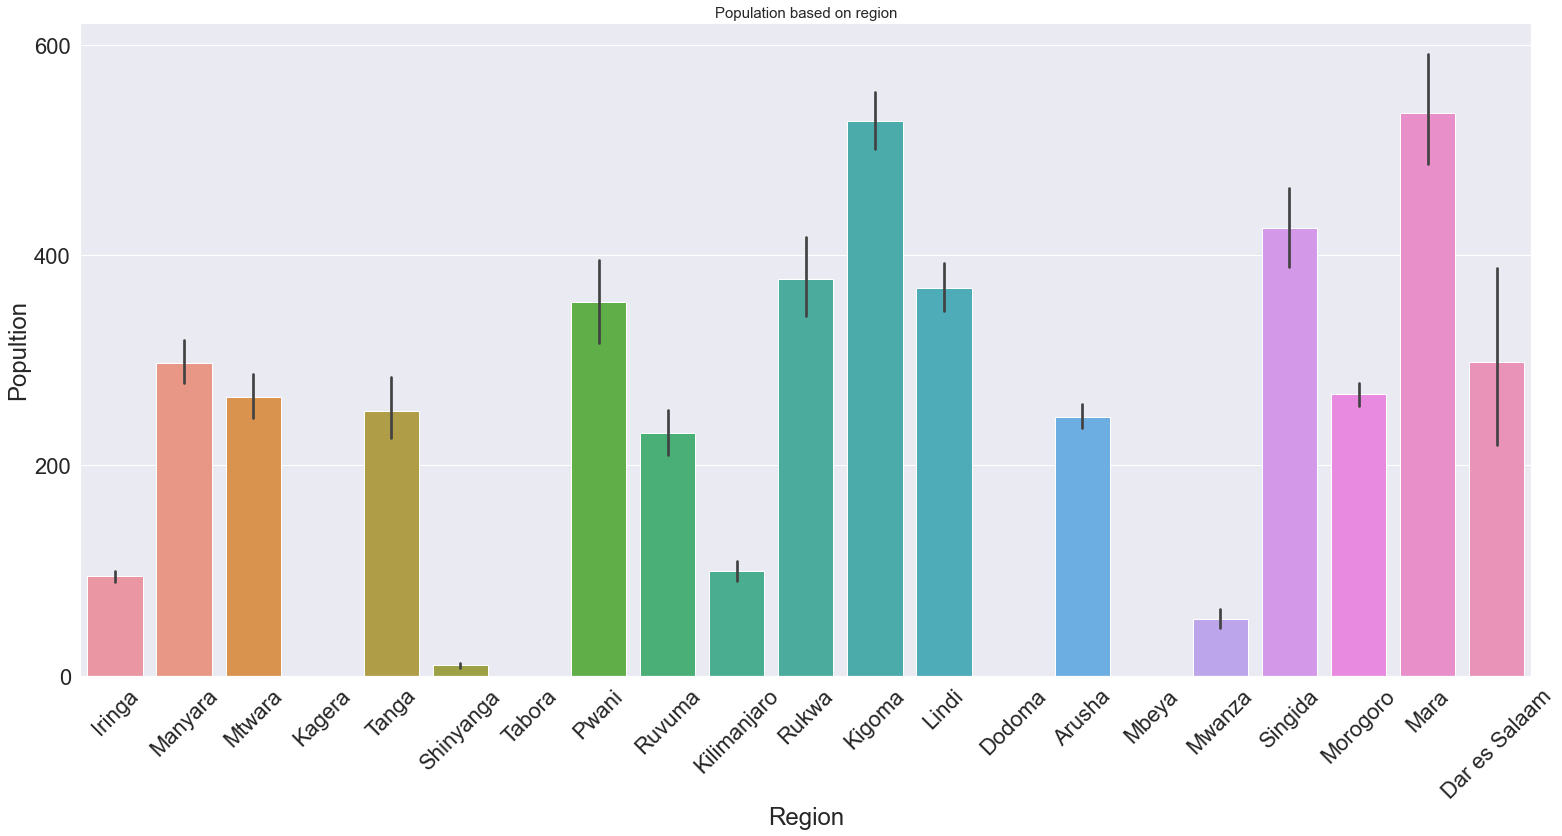

In [41]:
fig,ax = plt.subplots(figsize=(26,12))
ax = sns.barplot(x='region', y = "population",data=df)
sns.set(font_scale = 5)
plt.title('Population based on region',fontsize=15)
ax.set_xlabel('Region')
ax.set_ylabel('Popultion')
g.set_xticks(range(2))
g.set_xticklabels(['Functional','Non Functional']);
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

### waterpoint counts based on the permit

[Text(0, 0, 'False'), Text(1, 0, 'True')]

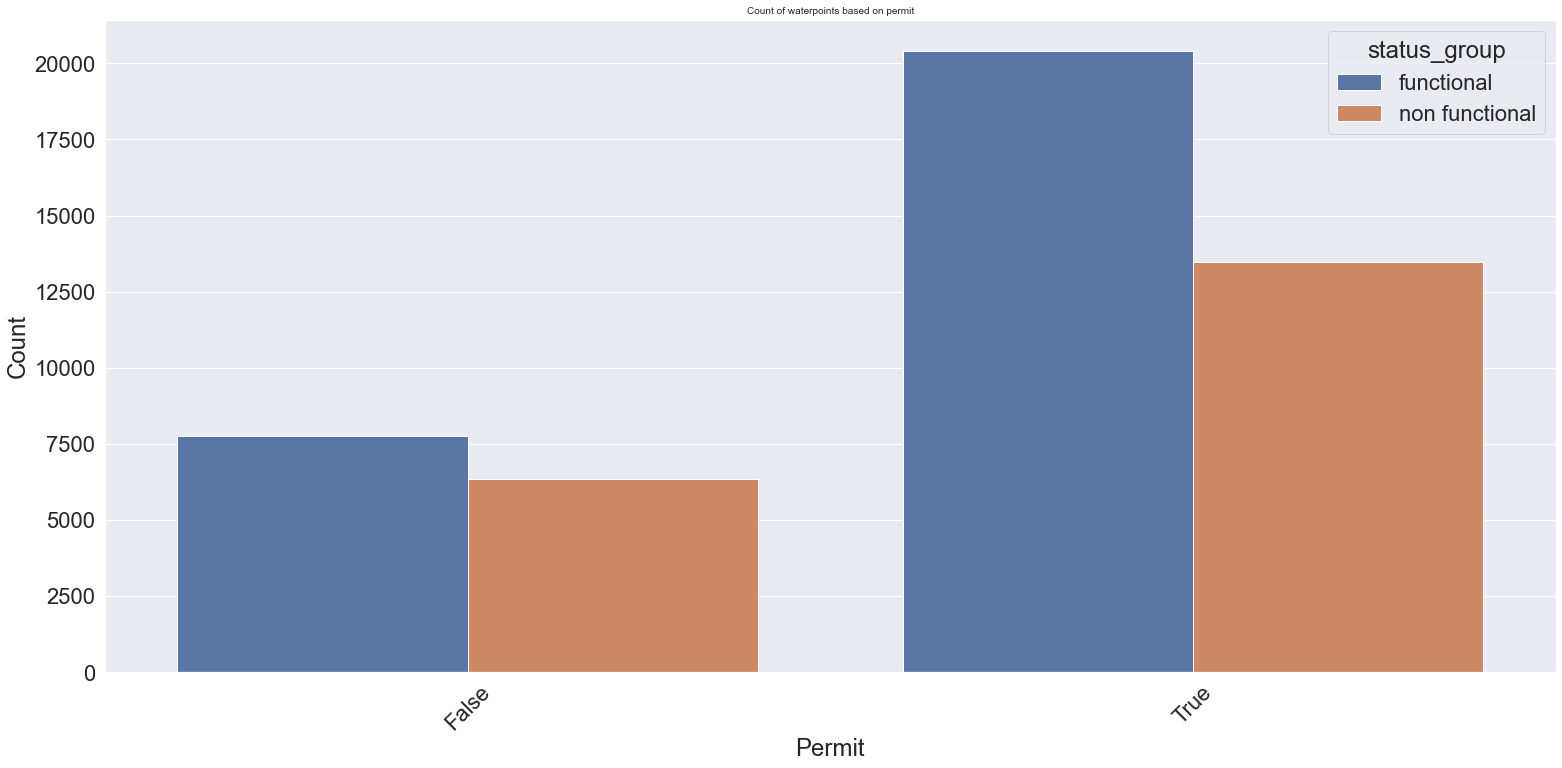

In [28]:
fig,ax = plt.subplots(figsize=(26,12))
ax = sns.countplot(x='permit', hue = "status_group",data=df)
sns.set(font_scale = 2)
plt.title('Count of waterpoints based on permit',fontsize=10)
ax.set_xlabel('Permit')
ax.set_ylabel('Count')
g.set_xticks(range(2))
g.set_xticklabels(['Functional','Non Functional']);
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

### functional or non functional based on payment

[Text(0, 0, 'pay annually'),
 Text(1, 0, 'pay per bucket'),
 Text(2, 0, 'never pay'),
 Text(3, 0, 'unknown'),
 Text(4, 0, 'pay when scheme fails'),
 Text(5, 0, 'other'),
 Text(6, 0, 'pay monthly')]

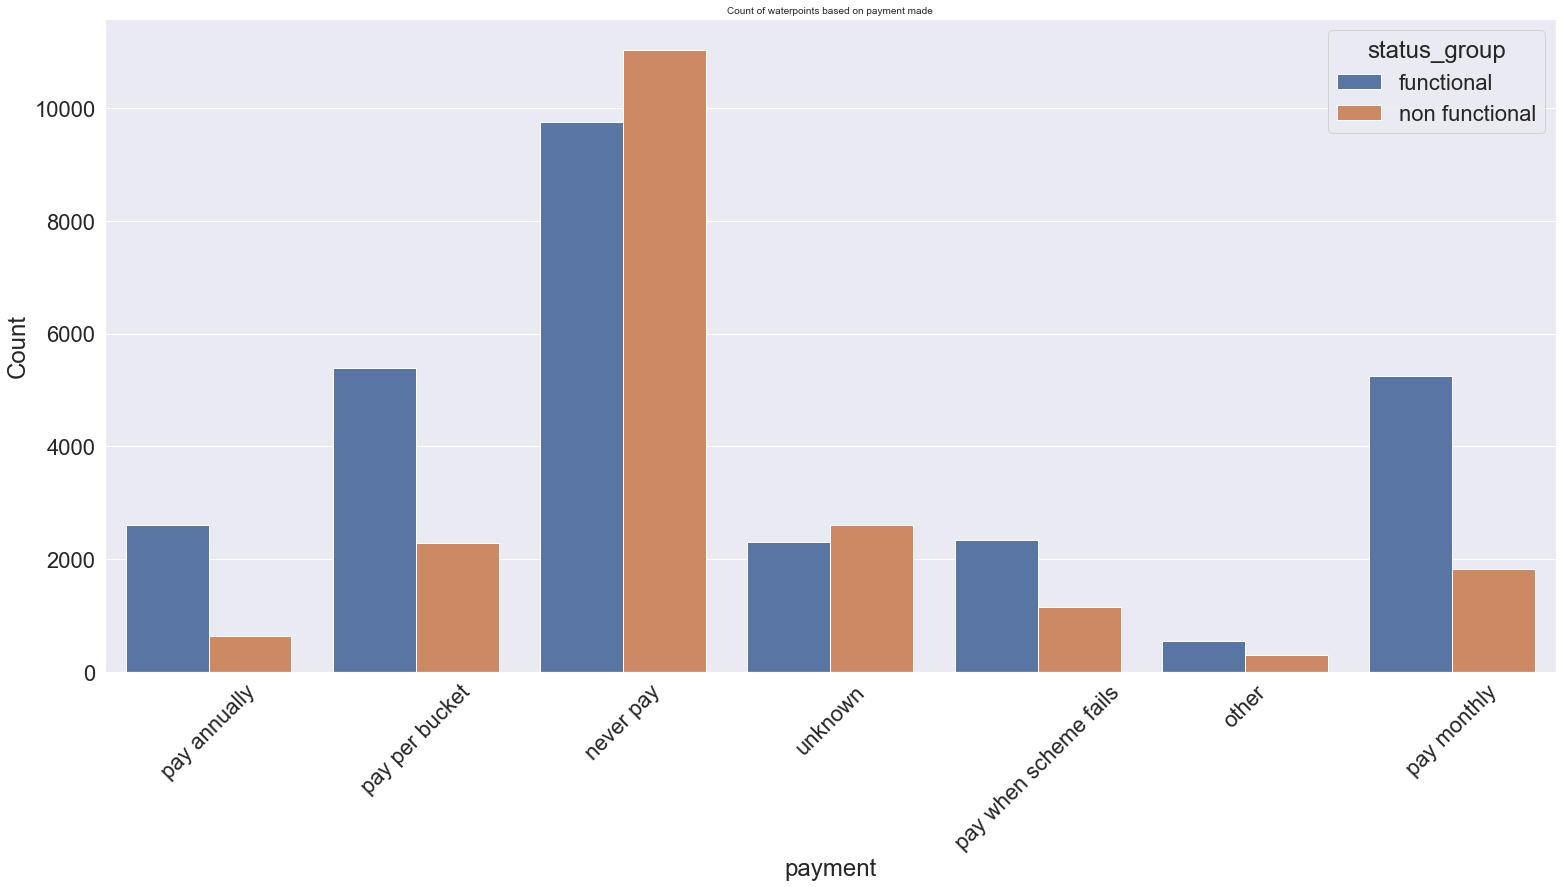

In [50]:
fig,ax = plt.subplots(figsize=(26,12))
ax = sns.countplot(x='payment', hue = "status_group",data=df)
sns.set(font_scale = 2)
plt.title('Count of waterpoints based on payment made',fontsize=10)
ax.set_xlabel('payment')
ax.set_ylabel('Count')
g.set_xticks(range(2))
g.set_xticklabels(['Functional','Non Functional']);
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

## functional or non functional based on construction year

In [23]:
year_df = df.loc[df['construction_year'] > 0]

[Text(0, 0, '1960'),
 Text(1, 0, '1961'),
 Text(2, 0, '1962'),
 Text(3, 0, '1963'),
 Text(4, 0, '1964'),
 Text(5, 0, '1965'),
 Text(6, 0, '1966'),
 Text(7, 0, '1967'),
 Text(8, 0, '1968'),
 Text(9, 0, '1969'),
 Text(10, 0, '1970'),
 Text(11, 0, '1971'),
 Text(12, 0, '1972'),
 Text(13, 0, '1973'),
 Text(14, 0, '1974'),
 Text(15, 0, '1975'),
 Text(16, 0, '1976'),
 Text(17, 0, '1977'),
 Text(18, 0, '1978'),
 Text(19, 0, '1979'),
 Text(20, 0, '1980'),
 Text(21, 0, '1981'),
 Text(22, 0, '1982'),
 Text(23, 0, '1983'),
 Text(24, 0, '1984'),
 Text(25, 0, '1985'),
 Text(26, 0, '1986'),
 Text(27, 0, '1987'),
 Text(28, 0, '1988'),
 Text(29, 0, '1989'),
 Text(30, 0, '1990'),
 Text(31, 0, '1991'),
 Text(32, 0, '1992'),
 Text(33, 0, '1993'),
 Text(34, 0, '1994'),
 Text(35, 0, '1995'),
 Text(36, 0, '1996'),
 Text(37, 0, '1997'),
 Text(38, 0, '1998'),
 Text(39, 0, '1999'),
 Text(40, 0, '2000'),
 Text(41, 0, '2001'),
 Text(42, 0, '2002'),
 Text(43, 0, '2003'),
 Text(44, 0, '2004'),
 Text(45, 0, '2005')

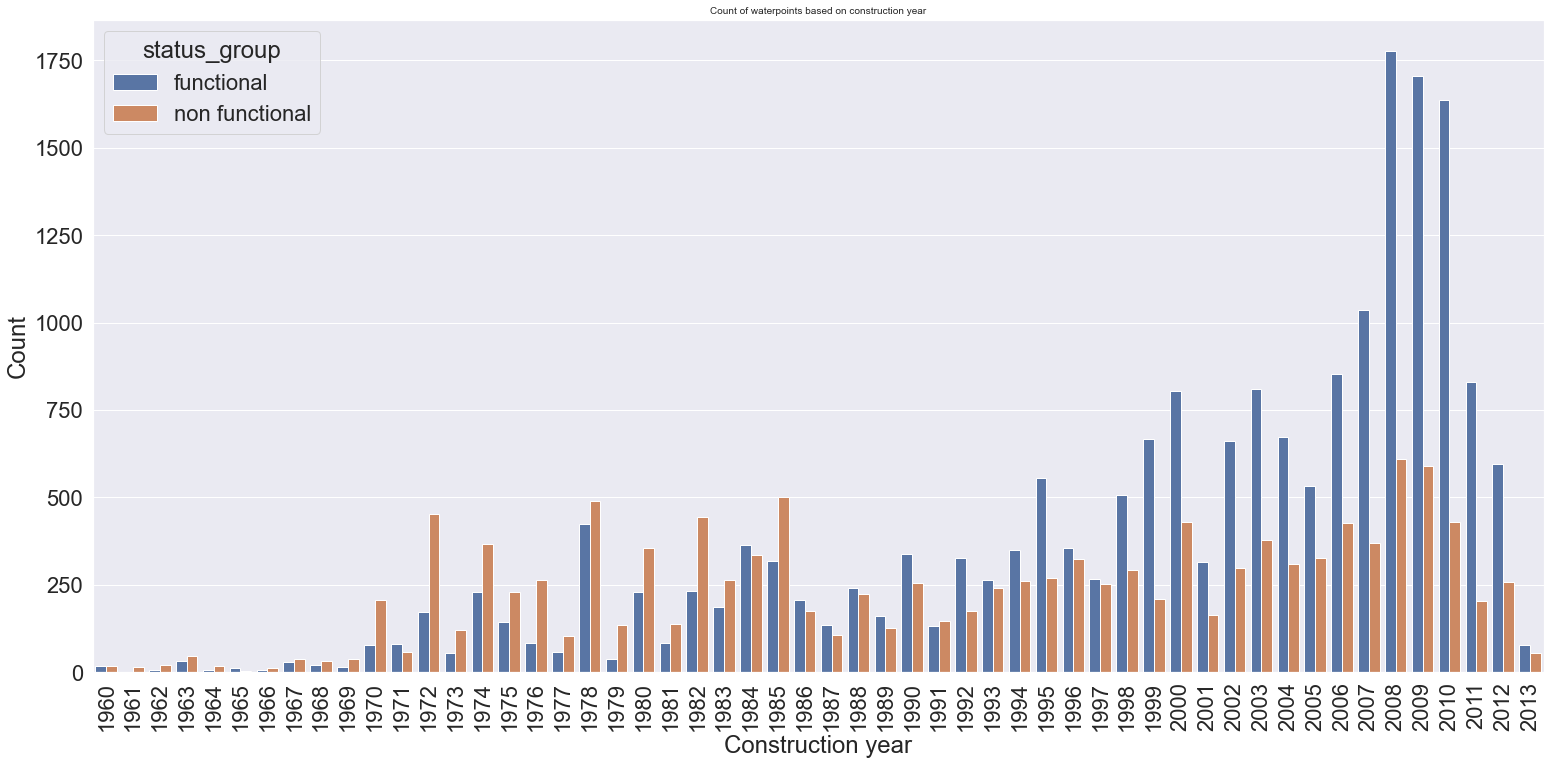

In [24]:
fig,ax = plt.subplots(figsize=(26,12))
ax = sns.countplot(x='construction_year', hue="status_group", data=year_df)
sns.set(font_scale =2)
g.set_xticks(range(9))

plt.title('Count of waterpoints based on construction year',fontsize=10)
ax.set_xlabel('Construction year')
ax.set_ylabel('Count')

#g.set_xticklabels(['Functional','Non Functional']);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

#### It can be seen that, out of all the water points built in the recent year, most are functional,
#### Many of the water points that were built before 1998, are non functional

In [23]:
source_df = df.loc[(df['source'] != 'other') & (df['source'] != 'unknown')]

In [24]:
source_df

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,...,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,status_group,status_group_bin
0,6000.0,Roman,1390,Roman,34.938093,-9.856322,unknown,Lake Nyasa,Mnyusi B,Iringa,...,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional,1
1,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,...,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,1
2,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,0
3,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,...,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,1
5,0.0,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,Ishinabulandi,Shinyanga,...,0,swn 80,vwc,never pay,soft,enough,machine dbh,hand pump,non functional,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47994,500.0,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,Wami / Ruvu,Komstari,Morogoro,...,2007,submersible,vwc,pay monthly,soft,enough,machine dbh,communal standpipe,non functional,0
47995,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,...,1999,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,functional,1
47996,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,...,1996,gravity,vwc,pay annually,soft,enough,river,communal standpipe,functional,1
47997,0.0,Malec,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,Mwinyi,Dodoma,...,0,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,functional,1


### functional or non functional based on source

[Text(0, 0, 'spring'),
 Text(1, 0, 'dam'),
 Text(2, 0, 'machine dbh'),
 Text(3, 0, 'rainwater harvesting'),
 Text(4, 0, 'shallow well'),
 Text(5, 0, 'river'),
 Text(6, 0, 'hand dtw'),
 Text(7, 0, 'lake')]

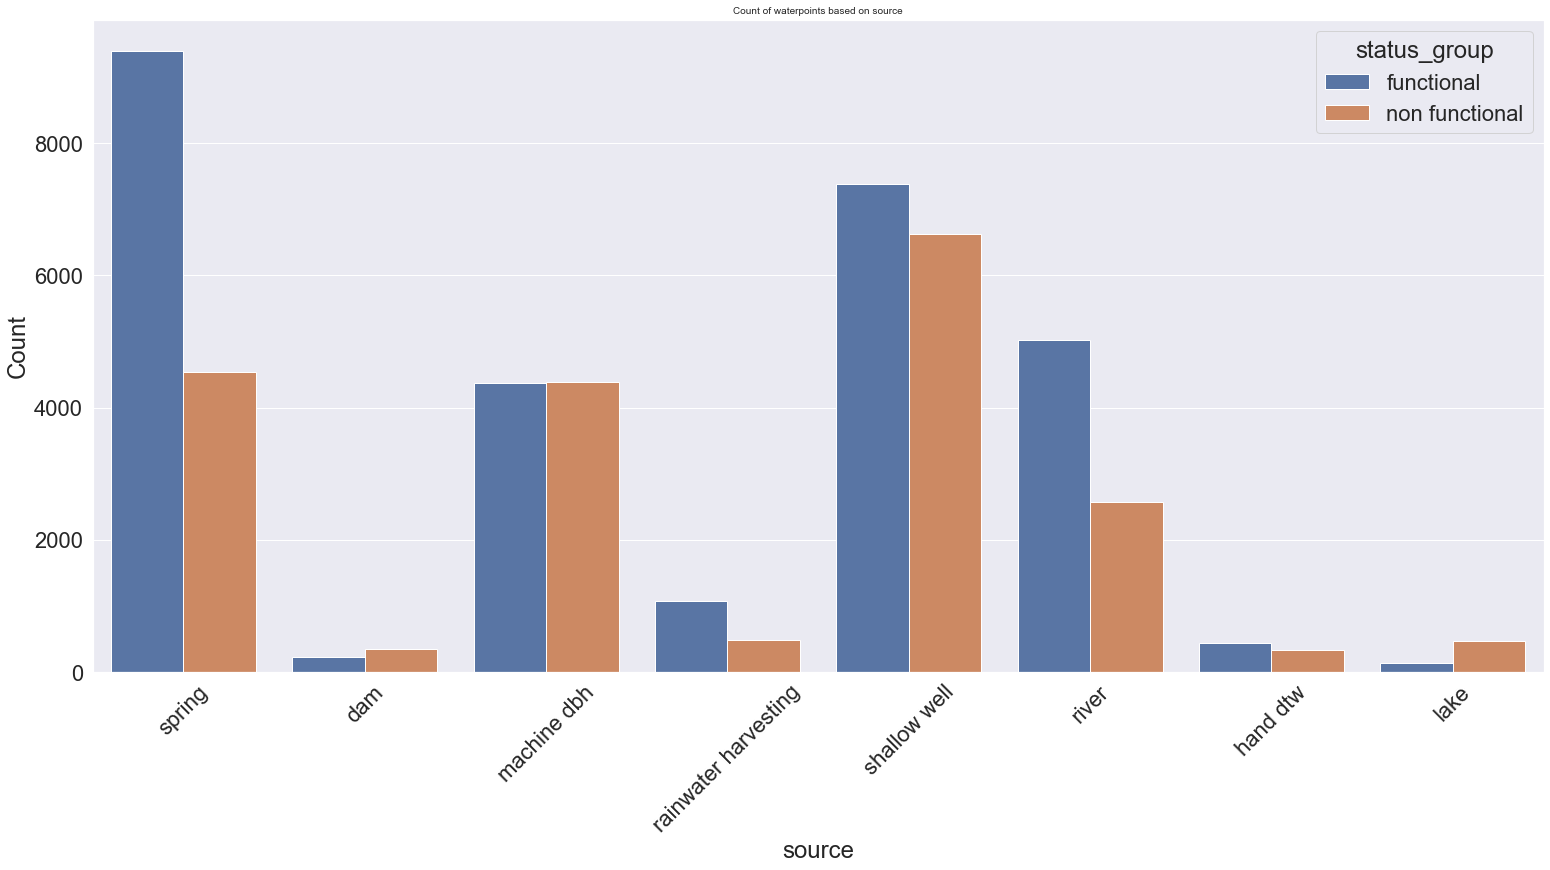

In [54]:
fig,ax = plt.subplots(figsize=(26,12))
ax = sns.countplot(x='source', hue="status_group", data=source_df)
sns.set(font_scale = 2)
plt.title('Count of waterpoints based on source',fontsize=10)
ax.set_xlabel('source')
ax.set_ylabel('Count')
g.set_xticks(range(2))
g.set_xticklabels(['Functional','Non Functional']);
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

### functional or non functional based on quantity

[Text(0, 0, 'enough'),
 Text(1, 0, 'dry'),
 Text(2, 0, 'seasonal'),
 Text(3, 0, 'insufficient'),
 Text(4, 0, 'unknown')]

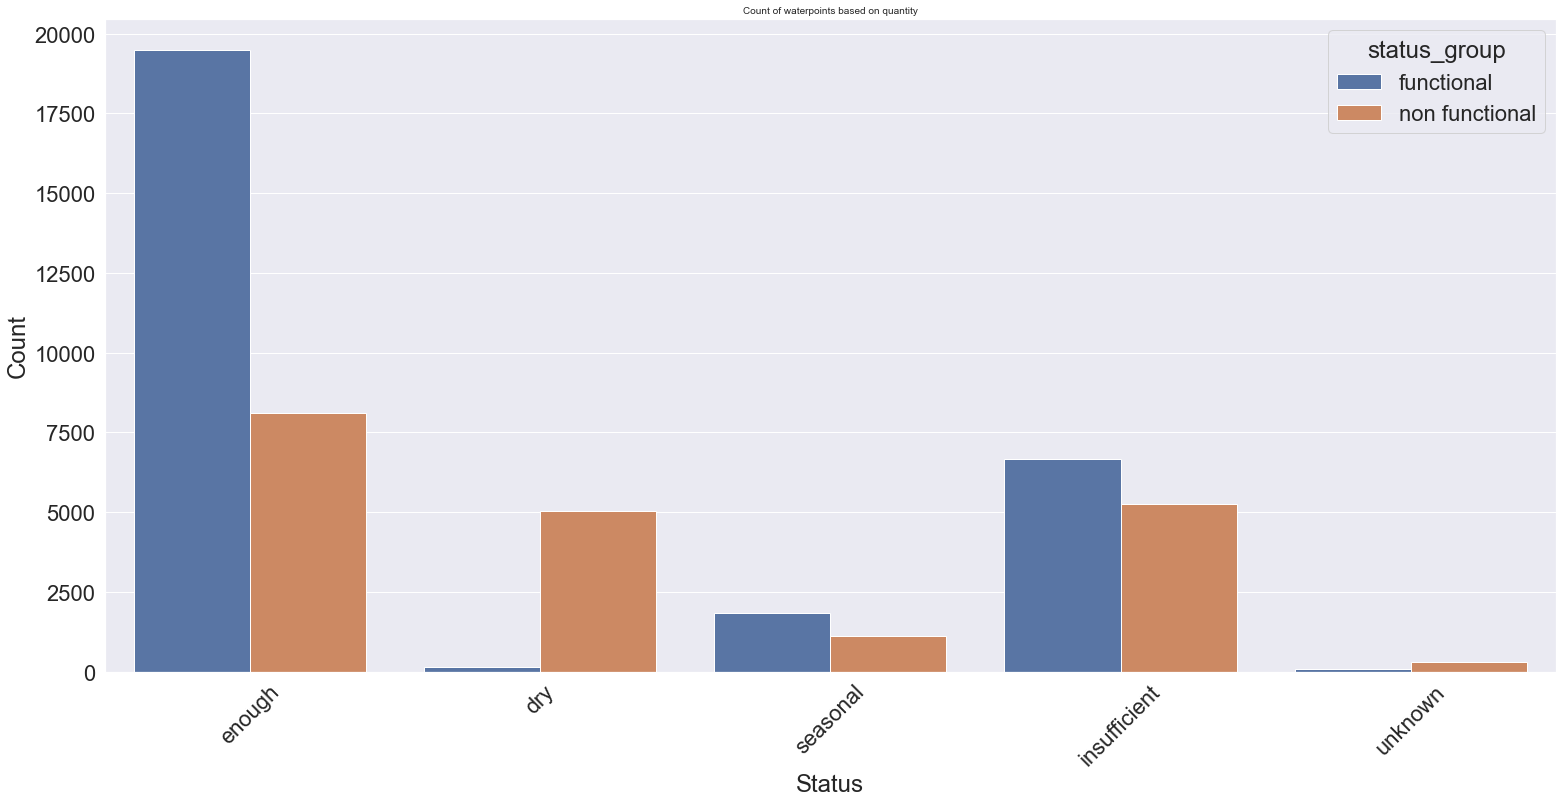

In [27]:
fig,ax = plt.subplots(figsize=(26,12))
ax = sns.countplot(x='quantity', hue="status_group", data=df)
sns.set(font_scale = 2)
plt.title('Count of waterpoints based on quantity',fontsize=10)
ax.set_xlabel('Status')
ax.set_ylabel('Count')
g.set_xticks(range(2))
g.set_xticklabels(['Functional','Non Functional']);
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

### functional or non functional based on waterpoint_type

[Text(0, 0, 'communal standpipe'),
 Text(1, 0, 'communal standpipe multiple'),
 Text(2, 0, 'hand pump'),
 Text(3, 0, 'other'),
 Text(4, 0, 'improved spring'),
 Text(5, 0, 'cattle trough'),
 Text(6, 0, 'dam')]

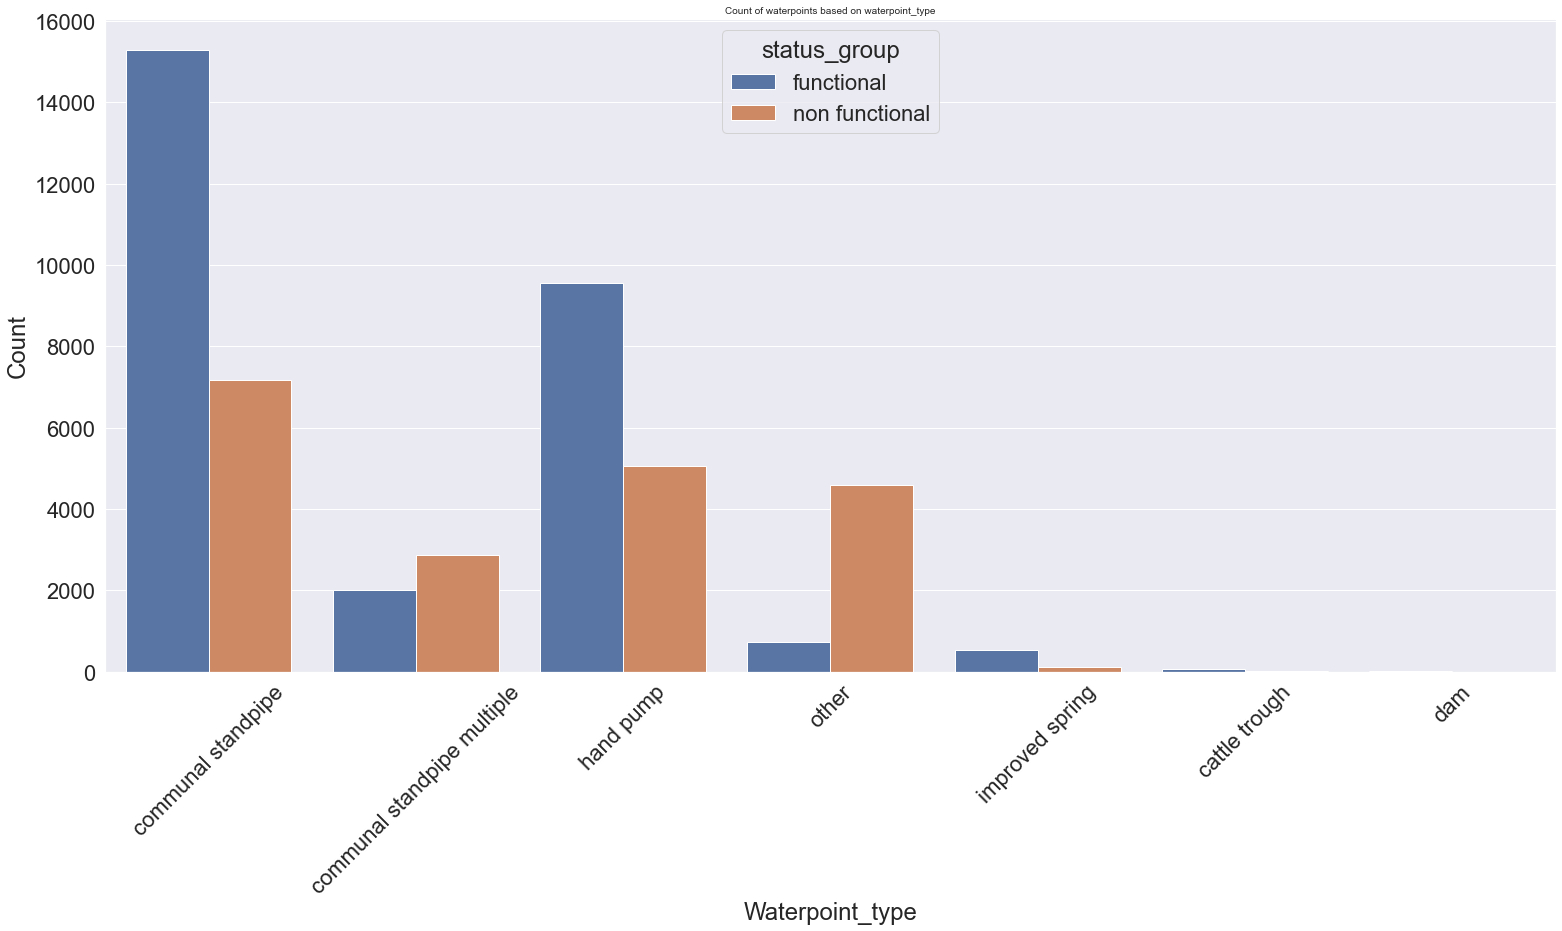

In [26]:
fig,ax = plt.subplots(figsize=(26,12))
ax = sns.countplot(x='waterpoint_type', hue="status_group", data=df)
sns.set(font_scale = 2)
plt.title('Count of waterpoints based on waterpoint_type',fontsize=10)
ax.set_xlabel('Waterpoint_type')
ax.set_ylabel('Count')
g.set_xticks(range(2))
g.set_xticklabels(['Functional','Non Functional']);
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

### functional or non functional based on extracting_type

[Text(0, 0, 'gravity'),
 Text(1, 0, 'submersible'),
 Text(2, 0, 'swn 80'),
 Text(3, 0, 'nira/tanira'),
 Text(4, 0, 'india mark ii'),
 Text(5, 0, 'ksb'),
 Text(6, 0, 'other'),
 Text(7, 0, 'windmill'),
 Text(8, 0, 'afridev'),
 Text(9, 0, 'other - rope pump'),
 Text(10, 0, 'india mark iii'),
 Text(11, 0, 'mono'),
 Text(12, 0, 'other - swn 81'),
 Text(13, 0, 'other - play pump'),
 Text(14, 0, 'cemo'),
 Text(15, 0, 'climax'),
 Text(16, 0, 'walimi'),
 Text(17, 0, 'other - mkulima/shinyanga')]

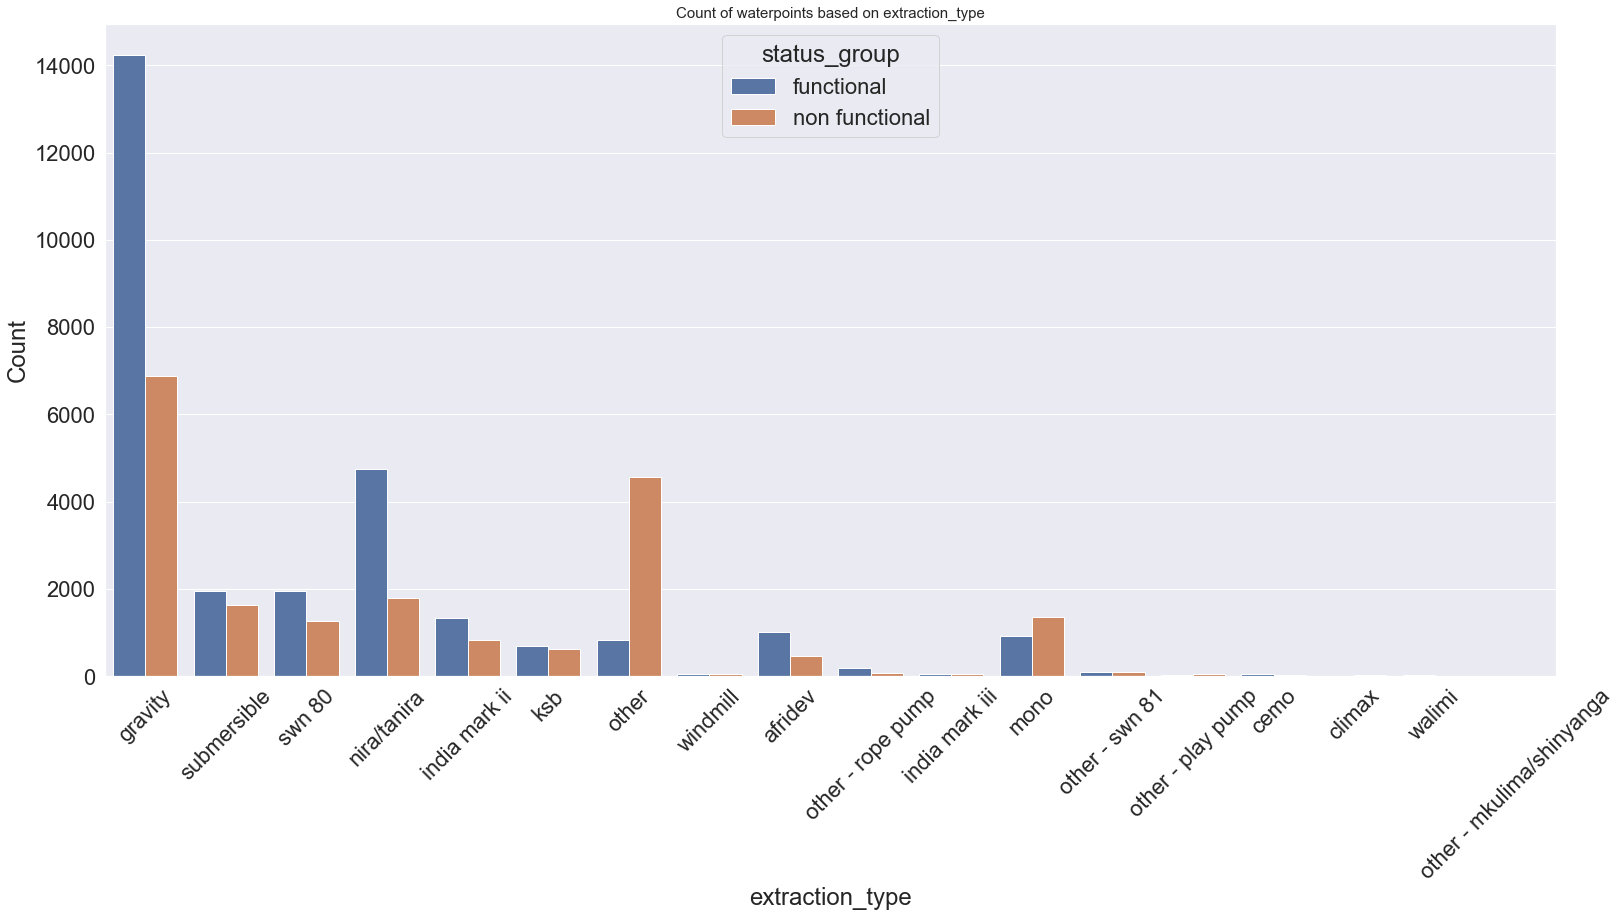

In [25]:
fig,ax = plt.subplots(figsize=(26,12))
ax = sns.countplot(x='extraction_type', hue="status_group", data=df)
sns.set(font_scale =2)
plt.title('Count of waterpoints based on extraction_type',fontsize=15)
ax.set_xlabel('extraction_type')
ax.set_ylabel('Count')
g.set_xticks(range(2))
g.set_xticklabels(['Functional','Non Functional']);
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)